In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly


mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows', 500)
sns.set(style="darkgrid")

import plotly.graph_objects as go

In [2]:
datapath= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183687,183908,184038,184224,184360,184473,184587,184819,185086,185272
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296732,298578,300058,301394,302767,303925,304890,305123,306789,308050
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266487,266542,266591,266654,266700,266772,266839,266916,267010,267096
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45061,45326,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102209,102301,102301,102301,102301,102301,102301


In [4]:
pd_raw.columns[:]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/18/22', '7/19/22', '7/20/22', '7/21/22', '7/22/22', '7/23/22',
       '7/24/22', '7/25/22', '7/26/22', '7/27/22'],
      dtype='object', length=922)

In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot= pd.DataFrame({ 'Date':
                       time_idx
    
})
df_plot.head()

,Date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [8]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [9]:
pd_raw[pd_raw['Country/Region']=='US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
257,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,89721856,89837983,90053464,90207453,90374094,90398709,90410386,90567290,90733888,90973418


In [10]:
import numpy as np
country_list=['Italy', 'US', 'Spain','Germany', 'Korea,South']

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [12]:
df_plot

,Date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0.0
1,1/23/20,0,1,0,0,0.0
2,1/24/20,0,2,0,0,0.0
3,1/25/20,0,2,0,0,0.0
4,1/26/20,0,5,0,0,0.0
...,...,...,...,...,...,...
913,7/23/22,20608190,90398709,13204863,30331133,0.0
914,7/24/22,20660065,90410386,13204863,30331133,0.0
915,7/25/22,20684182,90567290,13204863,30476605,0.0
916,7/26/22,20772833,90733888,13203228,30598385,0.0


<AxesSubplot:xlabel='Date'>

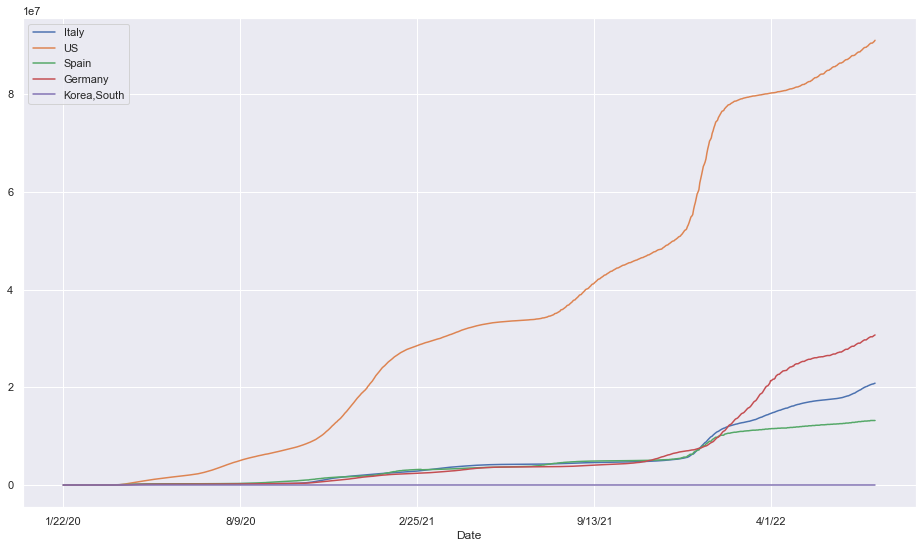

In [13]:
df_plot.set_index('Date').plot()

In [14]:
# section 4.2 done Conversion of Date Objects

In [15]:
df_plot.head()

,Date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0.0
1,1/23/20,0,1,0,0,0.0
2,1/24/20,0,2,0,0,0.0
3,1/25/20,0,2,0,0,0.0
4,1/26/20,0,5,0,0,0.0


In [16]:
from datetime import datetime

In [17]:
df_plot.Date[0]

'1/22/20'

In [18]:
datetime.strptime(df_plot.Date[0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [19]:
time_idx=[datetime.strptime(each, '%m/%d/%y') for each in df_plot.Date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [20]:
time_idx

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 16, 0,

In [21]:
df_plot['Date']=time_idx
type(df_plot['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
df_plot.head()

,Date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0.0
1,2020-01-23,0,1,0,0,0.0
2,2020-01-24,0,2,0,0,0.0
3,2020-01-25,0,2,0,0,0.0
4,2020-01-26,0,5,0,0,0.0


In [23]:
df_plot.to_csv('processed_data.csv', sep=';', index=False)

In [24]:
df_plot

,Date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0.0
1,2020-01-23,0,1,0,0,0.0
2,2020-01-24,0,2,0,0,0.0
3,2020-01-25,0,2,0,0,0.0
4,2020-01-26,0,5,0,0,0.0
...,...,...,...,...,...,...
913,2022-07-23,20608190,90398709,13204863,30331133,0.0
914,2022-07-24,20660065,90410386,13204863,30331133,0.0
915,2022-07-25,20684182,90567290,13204863,30476605,0.0
916,2022-07-26,20772833,90733888,13203228,30598385,0.0


In [25]:
# section 4.3 done Relational data structures

In [26]:
import pandas as pd

In [27]:
datapath= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [28]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183687,183908,184038,184224,184360,184473,184587,184819,185086,185272
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,296732,298578,300058,301394,302767,303925,304890,305123,306789,308050
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266487,266542,266591,266654,266700,266772,266839,266916,267010,267096
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45061,45061,45061,45326,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102209,102301,102301,102301,102301,102301,102301


In [29]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state' })

In [30]:
pd_data_base

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,183687,183908,184038,184224,184360,184473,184587,184819,185086,185272
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,296732,298578,300058,301394,302767,303925,304890,305123,306789,308050
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266487,266542,266591,266654,266700,266772,266839,266916,267010,267096
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45061,45061,45061,45326,45326,45326,45326,45326,45326,45326
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,102209,102209,102209,102209,102301,102301,102301,102301,102301,102301
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8712,8712,8712,8712,8736,8736,8736,8736,8741,8741
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9465827,9465827,9465827,9465827,9465827,9465827,9507562,9507562,9507562,9507562
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,424400,424400,424400,424400,424400,424400,424400,425365,425365,425365
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,180333,181294,182701,183592,184636,185348,186138,187087,188191,189191


In [31]:
pd_data_base=pd_data_base.drop(['Lat', 'Long'], axis=1)

In [32]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,183687,183908,184038,184224,184360,184473,184587,184819,185086,185272
1,NaN,Albania,0,0,0,0,0,0,0,0,...,296732,298578,300058,301394,302767,303925,304890,305123,306789,308050
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,266487,266542,266591,266654,266700,266772,266839,266916,267010,267096
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,45061,45061,45061,45326,45326,45326,45326,45326,45326,45326
4,NaN,Angola,0,0,0,0,0,0,0,0,...,102209,102209,102209,102209,102301,102301,102301,102301,102301,102301


In [33]:
pd_data_base.set_index(['state','country'])

1/22/20  \
state                                        country                                     
NaN                                          Afghanistan                             0   
                                             Albania                                 0   
                                             Algeria                                 0   
                                             Andorra                                 0   
                                             Angola                                  0   
                                             Antarctica                              0   
                                             Antigua and Barbuda                     0   
                                             Argentina                               0   
                                             Armenia                                 0   
Australian Capital Territory                 Australia                               0   
New South Wales                              Australia                               0   
Northern Territory                           Australia                               0   
Queensland                                   Australia                               0   
South Australia                              Australia                               0   
Tasmania                                     Australia                               0   
Victoria                                     Australia                               0   
Western Australia                            Australia                               0   
NaN                                          Austria                                 0   
                                             Azerbaijan                              0   
                                             Bahamas                                 0   
                                             Bahrain                                 0   
                                             Bangladesh                              0   
                                             Barbados                                0   
                                             Belarus                                 0   
                                             Belgium                                 0   
                                             Belize                                  0   
                                             Benin                                   0   
                                             Bhutan                                  0   
                                             Bolivia                                 0   
                                             Bosnia and Herzegovina                  0   
                                             Botswana                                0   
                                             Brazil                                  0   
                                             Brunei                                  0   
                                             Bulgaria                                0   
                                             Burkina Faso                            0   
                                             Burma                                   0   
                                             Burundi                                 0   
                                             Cabo Verde                              0   
                                             Cambodia                                0   
                                             Cameroon                                0   
Alberta                                      Canada                                  0   
British Columbia                             Canada                                  0   
Diamond Princess                             Canada                                  0   
Grand Princess               

In [34]:
test_pd=pd_data_base.set_index(['state','country']).T
test_pd

state           NaN                                             \
country Afghanistan Albania Algeria Andorra  Angola Antarctica   
1/22/20           0       0       0       0       0          0   
1/23/20           0       0       0       0       0          0   
1/24/20           0       0       0       0       0          0   
1/25/20           0       0       0       0       0          0   
1/26/20           0       0       0       0       0          0   
...             ...     ...     ...     ...     ...        ...   
7/23/22      184473  303925  266772   45326  102301         11   
7/24/22      184587  304890  266839   45326  102301         11   
7/25/22      184819  305123  266916   45326  102301         11   
7/26/22      185086  306789  267010   45326  102301         11   
7/27/22      185272  308050  267096   45326  102301         11   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   
...                     ...       ...     ...                          ...   
7/23/22                8736   9465827  424400                       185348   
7/24/22                8736   9507562  424400                       186138   
7/25/22                8736   9507562  425365                       187087   
7/26/22                8741   9507562  425365                       188191   
7/27/22                8741   9507562  425365                       189191   

state    ...     NaN                                         \
country  ... Uruguay Uzbekistan Vanuatu Venezuela   Vietnam   
1/22/20  ...       0          0       0         0         0   
1/23/20  ...       0          0       0         0         2   
1/24/20  ...       0          0       0         0         2   
1/25/20  ...       0          0       0         0         2   
1/26/20  ...       0          0       0         0         2   
...      ...     ...        ...     ...       ...       ...   
7/23/22  ...  967808     242632   11723    531963  10767200   
7/24/22  ...  967808     242691   11723    532902  10767948   
7/25/22  ...  967808     242747   11723    533195  10768844   
7/26/22  ...  969803     242811   11723    533195  10770304   
7/27/22  ...  969803     242879   11723    533379  10772980   

state                                                                    
country West Bank and Gaza Winter Olympics 2022  Yemen  Zambia Zimbabwe  
1/22/20                  0                    0      0       0        0  
1/23/20                  0                    0      0       0        0  
1/24/20                  0                    0      0       0        0  
1/25/20                  0                    0      0       0        0  
1/26/20                  0                    0      0       0        0  
...                    ...                  ...    ...     ...      ...  
7/23/22             672039                  535  11849  328550   256246  
7/24/22             672039                  535  11849  328550   256254  
7/25/22             672039                  535  11849  329483   256270  
7/26/22             682096                  535  11849  329483   256284  
7/27/22             682096                  535  11849  329483   256315  

[918 rows x 285 columns]

In [35]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [36]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
261625,7/27/22,Western Australia,Australia,1053190.0
261626,7/27/22,Xinjiang,China,1008.0
261627,7/27/22,Yukon,Canada,4640.0
261628,7/27/22,Yunnan,China,2206.0


In [37]:
pd_relational_model=pd_data_base.set_index(['state', 'country'])\
.T \
.stack(level=[0,1]) \
.reset_index() \
.rename(columns={'level_0':'date', 0:'confirmed'},
       )

In [38]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [39]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [40]:
pd_relational_model.to_csv('COVID_relational_confirmed.csv', sep = ';', index = None)